In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mailbox

In [45]:
# pip install mailbox

In [2]:
# store the raw email data inside a variable
mboxfile = 'All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(mboxfile)  #use mailbox to read the data in the mbox file
mbox

In [3]:
# check the key in the mbox file

for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
DomainKey-Signature
To
Cc
From
Subject
Message-Id
MIME-Version
Content-Type
Content-Transfer-Encoding
X-Mailer
List-Unsubscribe
Feedback-Id
X-Fncid
X-Traffic-Type
Date


In [4]:
# DATA TRANSFORMATION
# data cleaning
import csv

In [5]:
# create a CSV file of the required attributes

with open('mbox.csv', 'w', errors='ignore') as outfile:
    writer = csv.writer(outfile)
#     writer.writerow(['subject', 'from', 'date', 'to', 'label', 'thread'])
    for message in mbox:
        writer.writerow([
            message['subject'],
            message['from'],
            message['date'],
            message['to'],
            message['X-Gmail-Labels'],
            message['X-GM-THRID']
        ])

In [6]:
# READ MAILBOX.CSV INTO A DATAFRAME
dfs =pd.read_csv('mbox.csv',
                names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [7]:
dfs.head()

,subject,from,date,to,label,thread
0,=?UTF-8?B?Tndhbmt3byBFYmVyZWNoaSBNYXVyZWVuLCBo...,=?UTF-8?B?TUlUIElEU1MgIERTTUw=?= <dsml.mit@myg...,"Wed, 24 Aug 2022 16:51:38 +0530",nwankwotessy26@gmail.com,"Inbox,Important,Opened,Category Updates",1742041355514629144
1,Unicaf University (MW) Account created.,no-reply <no-reply@unicaf.org>,"Wed, 24 Aug 2022 08:19:02 +0000",Eberechi Nwankwo <nwankwotessy26@gmail.com>,"Inbox,Important,Opened,Category Updates",1742029867314865784
2,Your Google data is ready to download,Google Takeout <noreply@google.com>,"Tue, 23 Aug 2022 21:15:28 +0000",nwankwotessy26@gmail.com,"Inbox,Important,Opened,Category Updates",1741988118802967167
3,=?UTF-8?B?8J+OgiBPbnllZGlrYWNoaSBD?=\r\n =?UTF...,"""Facebook"" <birthdays@facebookmail.com>","Thu, 25 Aug 2022 22:30:31 -0700",Tess Nwankwo <nwankwotessy26@gmail.com>,"Inbox,Category Social,Unread",1742200466660213467
4,[New post] University of Surrey Scholarship 20...,OYA Opportunities <donotreply@wordpress.com>,"Tue, 23 Aug 2022 12:09:06 +0000",nwankwotessy26@gmail.com,"Inbox,Category Updates,Unread",1741953745361607654


In [8]:
# to check the data types of each column

dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread      int64
dtype: object

In [9]:
# to select the date column

dfs['date'].head()

0    Wed, 24 Aug 2022 16:51:38 +0530
1    Wed, 24 Aug 2022 08:19:02 +0000
2    Tue, 23 Aug 2022 21:15:28 +0000
3    Thu, 25 Aug 2022 22:30:31 -0700
4    Tue, 23 Aug 2022 12:09:06 +0000
Name: date, dtype: object

In [23]:
# convert the date to datetime

dfs['date'] = dfs['date'].apply(lambda x:pd.to_datetime(x, errors='coerce', utc=True) )  #corece means to convert any error into NaN


In [24]:
# descriptive statistics

dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20988 entries, 0 to 20987
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  20988 non-null  int64              
 1   subject     20972 non-null  object             
 2   from        20988 non-null  object             
 3   date        20988 non-null  datetime64[ns, UTC]
 4   to          20985 non-null  object             
 5   label       20988 non-null  object             
 6   thread      20988 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 1.3+ MB


In [25]:
# convert the date column to datetime format

dfs['date'].head(3)

0   2022-08-24 11:21:38+00:00
1   2022-08-24 08:19:02+00:00
2   2022-08-23 21:15:28+00:00
Name: date, dtype: datetime64[ns, UTC]

In [26]:
# Remove NaN Values
dfs = dfs[dfs['date'].notna()] 

In [27]:
# check for missing values in the date column

dfs['date'].isnull().sum()    #there's no missing value in my date column

0

In [28]:
# convert a dataframe to a csv file

dfs.to_csv('gmail.csv')

In [29]:

dfs.head()

,Unnamed: 0,subject,from,date,to,label,thread
0,0,=?UTF-8?B?Tndhbmt3byBFYmVyZWNoaSBNYXVyZWVuLCBo...,dsml.mit@mygreatlearning.com,2022-08-24 11:21:38+00:00,nwankwotessy26@gmail.com,inbox,1742041355514629144
1,1,Unicaf University (MW) Account created.,no-reply@unicaf.org,2022-08-24 08:19:02+00:00,Eberechi Nwankwo <nwankwotessy26@gmail.com>,inbox,1742029867314865784
2,2,Your Google data is ready to download,noreply@google.com,2022-08-23 21:15:28+00:00,nwankwotessy26@gmail.com,inbox,1741988118802967167
3,3,=?UTF-8?B?8J+OgiBPbnllZGlrYWNoaSBD?=\r\n =?UTF...,birthdays@facebookmail.com,2022-08-26 05:30:31+00:00,Tess Nwankwo <nwankwotessy26@gmail.com>,inbox,1742200466660213467
4,4,[New post] University of Surrey Scholarship 20...,donotreply@wordpress.com,2022-08-23 12:09:06+00:00,nwankwotessy26@gmail.com,inbox,1741953745361607654


# refactoring the data in 'from' column


In [16]:
dfs['from'].head(3)

0    =?UTF-8?B?TUlUIElEU1MgIERTTUw=?= <dsml.mit@myg...
1                       no-reply <no-reply@unicaf.org>
2                  Google Takeout <noreply@google.com>
Name: from, dtype: object

In [17]:
dfs.loc[1]   # to access a row in a file

Unnamed: 0                                              1
subject           Unicaf University (MW) Account created.
from                       no-reply <no-reply@unicaf.org>
date                            2022-08-24 08:19:02+00:00
to            Eberechi Nwankwo <nwankwotessy26@gmail.com>
label             Inbox,Important,Opened,Category Updates
thread                                1742029867314865784
Name: 1, dtype: object

In [30]:
# a function to pull out the email address
import re

def get_email_address(string):
    email = re.findall(r'<(.+?)>', string)    #findall reg exp.(r',<(.+?)>',) and return in a new column called string which returns as a tuple
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))  #change it as a list, filter it by extracting anyone with an @ in email
    return email[0] if email else np.NAN   #return email starting from index 0 else return NAN.

In [31]:
# apply to 'from' column

dfs['from'] = dfs['from'].apply(lambda x: get_email_address(x))

# refactor the label data
# if email is from me, then it is sent, otherwise it is inbox
me = 'nwankwotessy26@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==me else 'inbox')

# drop "to" column
# dfs.drop(columns='to', inplace=True)

In [32]:
dfs.head()

,Unnamed: 0,subject,from,date,to,label,thread
0,0,=?UTF-8?B?Tndhbmt3byBFYmVyZWNoaSBNYXVyZWVuLCBo...,dsml.mit@mygreatlearning.com,2022-08-24 11:21:38+00:00,nwankwotessy26@gmail.com,inbox,1742041355514629144
1,1,Unicaf University (MW) Account created.,no-reply@unicaf.org,2022-08-24 08:19:02+00:00,Eberechi Nwankwo <nwankwotessy26@gmail.com>,inbox,1742029867314865784
2,2,Your Google data is ready to download,noreply@google.com,2022-08-23 21:15:28+00:00,nwankwotessy26@gmail.com,inbox,1741988118802967167
3,3,=?UTF-8?B?8J+OgiBPbnllZGlrYWNoaSBD?=\r\n =?UTF...,birthdays@facebookmail.com,2022-08-26 05:30:31+00:00,Tess Nwankwo <nwankwotessy26@gmail.com>,inbox,1742200466660213467
4,4,[New post] University of Surrey Scholarship 20...,donotreply@wordpress.com,2022-08-23 12:09:06+00:00,nwankwotessy26@gmail.com,inbox,1741953745361607654


In [33]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20988 entries, 0 to 20987
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  20988 non-null  int64              
 1   subject     20972 non-null  object             
 2   from        20988 non-null  object             
 3   date        20988 non-null  datetime64[ns, UTC]
 4   to          20985 non-null  object             
 5   label       20988 non-null  object             
 6   thread      20988 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 1.3+ MB


In [34]:
# refactoring the time zones

import datetime
import pytz

In [23]:
# pytz.all_timezones  #to check all the time zone of the world

In [35]:
# refactoring the date column

def refactor_timezone(x):
    est = pytz.timezone('Africa/Lagos')
    return x.astimezone(est)
    

In [36]:
dfs.date.head()

0   2022-08-24 11:21:38+00:00
1   2022-08-24 08:19:02+00:00
2   2022-08-23 21:15:28+00:00
3   2022-08-26 05:30:31+00:00
4   2022-08-23 12:09:06+00:00
Name: date, dtype: datetime64[ns, UTC]

In [37]:
# applying the refactoring of the date column

dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))


In [38]:
dfs.date.head()

0   2022-08-24 12:21:38+01:00
1   2022-08-24 09:19:02+01:00
2   2022-08-23 22:15:28+01:00
3   2022-08-26 06:30:31+01:00
4   2022-08-23 13:09:06+01:00
Name: date, dtype: datetime64[ns, Africa/Lagos]

In [40]:
# extract the day of the week from the date column

dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())

In [41]:
dfs[['date', 'dayofweek']].head

<bound method NDFrame.head of                            date  dayofweek
0     2022-08-24 12:21:38+01:00  Wednesday
1     2022-08-24 09:19:02+01:00  Wednesday
2     2022-08-23 22:15:28+01:00    Tuesday
3     2022-08-26 06:30:31+01:00     Friday
4     2022-08-23 13:09:06+01:00    Tuesday
...                         ...        ...
20983 2022-05-31 08:14:26+01:00    Tuesday
20984 2022-05-12 22:17:39+01:00   Thursday
20985 2022-07-09 08:25:05+01:00   Saturday
20986 2022-07-27 11:01:16+01:00  Wednesday
20987 2022-05-29 10:05:38+01:00     Sunday

[20988 rows x 2 columns]>

In [42]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20988 entries, 0 to 20987
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype                       
---  ------      --------------  -----                       
 0   Unnamed: 0  20988 non-null  int64                       
 1   subject     20972 non-null  object                      
 2   from        20988 non-null  object                      
 3   date        20988 non-null  datetime64[ns, Africa/Lagos]
 4   to          20985 non-null  object                      
 5   label       20988 non-null  object                      
 6   thread      20988 non-null  int64                       
 7   dayofweek   20988 non-null  object                      
dtypes: datetime64[ns, Africa/Lagos](1), int64(2), object(5)
memory usage: 1.4+ MB


In [43]:
# convert the dayofweek column to a category
dfs['dayofweek'] = dfs.dayofweek.astype('category')

In [44]:
dfs['dayofweek'].info()

<class 'pandas.core.series.Series'>
Int64Index: 20988 entries, 0 to 20987
Series name: dayofweek
Non-Null Count  Dtype   
--------------  -----   
20988 non-null  category
dtypes: category(1)
memory usage: 184.8 KB


In [45]:
# extract the time of day
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [46]:
dfs[['date', 'dayofweek', 'timeofday']].head()

,date,dayofweek,timeofday
0,2022-08-24 12:21:38+01:00,Wednesday,12.360556
1,2022-08-24 09:19:02+01:00,Wednesday,9.317222
2,2022-08-23 22:15:28+01:00,Tuesday,22.257778
3,2022-08-26 06:30:31+01:00,Friday,6.508611
4,2022-08-23 13:09:06+01:00,Tuesday,13.151667


In [47]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [48]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [49]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [50]:
dfs[['date', 'dayofweek', 'timeofday', 'hour', 'year_int', 'year']].head(3)

,date,dayofweek,timeofday,hour,year_int,year
0,2022-08-24 12:21:38+01:00,Wednesday,12.360556,12,2022,2022.646133
1,2022-08-24 09:19:02+01:00,Wednesday,9.317222,9,2022,2022.646133
2,2022-08-23 22:15:28+01:00,Tuesday,22.257778,22,2022,2022.643395


In [51]:
dfs.index = dfs['date']

In [52]:
dfs.head()

,Unnamed: 0,subject,from,date,to,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,,,
2022-08-24 12:21:38+01:00,0,=?UTF-8?B?Tndhbmt3byBFYmVyZWNoaSBNYXVyZWVuLCBo...,dsml.mit@mygreatlearning.com,2022-08-24 12:21:38+01:00,nwankwotessy26@gmail.com,inbox,1742041355514629144,Wednesday,12.360556,12,2022,2022.646133
2022-08-24 09:19:02+01:00,1,Unicaf University (MW) Account created.,no-reply@unicaf.org,2022-08-24 09:19:02+01:00,Eberechi Nwankwo <nwankwotessy26@gmail.com>,inbox,1742029867314865784,Wednesday,9.317222,9,2022,2022.646133
2022-08-23 22:15:28+01:00,2,Your Google data is ready to download,noreply@google.com,2022-08-23 22:15:28+01:00,nwankwotessy26@gmail.com,inbox,1741988118802967167,Tuesday,22.257778,22,2022,2022.643395
2022-08-26 06:30:31+01:00,3,=?UTF-8?B?8J+OgiBPbnllZGlrYWNoaSBD?=\r\n =?UTF...,birthdays@facebookmail.com,2022-08-26 06:30:31+01:00,Tess Nwankwo <nwankwotessy26@gmail.com>,inbox,1742200466660213467,Friday,6.508611,6,2022,2022.651608
2022-08-23 13:09:06+01:00,4,[New post] University of Surrey Scholarship 20...,donotreply@wordpress.com,2022-08-23 13:09:06+01:00,nwankwotessy26@gmail.com,inbox,1741953745361607654,Tuesday,13.151667,13,2022,2022.643395


In [53]:
# to delete the date column which is not neccessary

del dfs['date']

In [54]:
# to know the number of emails sent and recieved

print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))  #the first email recieved
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))  #the last email recieved
print(dfs['label'].value_counts())   #number of inbox and sent messages

Mon, 21 Aug 2017 10:36 AM
Fri, 26 Aug 2022 09:24 AM
inbox    20921
sent        67
Name: label, dtype: int64


In [55]:
dfs.index.min()

Timestamp('2017-08-21 10:36:52+0100', tz='Africa/Lagos')

In [56]:
# details of the first email

dfs.loc['2017-08-21 10:36:52+0100']  

Unnamed: 0                                             20229
subject       Tessy, get more out of your new Android device
from                  googlecommunityteam-noreply@google.com
to                                  nwankwotessy26@gmail.com
label                                                  inbox
thread                                   1576332916654609551
dayofweek                                             Monday
timeofday                                          10.614444
hour                                                      10
year_int                                                2017
year                                             2017.637919
Name: 2017-08-21 10:36:52+01:00, dtype: object

In [57]:
# at what time of the day i send and recieved emails

sent = dfs[dfs['label'] == 'sent']
inbox = dfs[dfs['label'] == 'inbox']

In [58]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FixedLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpaches

In [59]:
# Create a function that takes a dataframe as an input and creates a plot
def plot_todo_vs_year(dfs, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(dfs), dtype='bool')
    est = pytz.timezone('Africa/Lagos')
    dfs[~ind].plot.scatter('year', 'timeofday', s=s,
                          alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(
        str(int(np.mod(ts, 24))), '%H').strftime('%I %p') for ts in ax.get_yticks()]);
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':',color='k')
    
    return ax

C:\Users\HP-PC\AppData\Local\Temp\ipykernel_19608\3253082075.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(


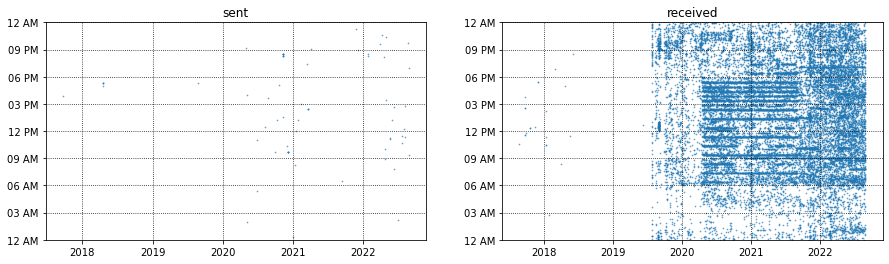

In [60]:
# Plot both received and sent emails
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
plot_todo_vs_year(sent, ax[0], title='sent')
plot_todo_vs_year(inbox, ax[1], title='received');

In [61]:
# What is the average number of emails per day?
# Create a function that counts the total number of emails per day
def plot_number_perday_per_year(df,ax,label=None,dt=0.3,**plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max()-year.min()
    bins = int(T/dt)
    weights = 1/(np.ones_like(year)*dt*365.25)
    ax.hist(year,bins=bins,weights=weights,label=label,**plot_kwargs);
    ax.grid(ls=':',color='k')

In [62]:
# Create a function that plots the average number of emails per day
def plot_number_perdhour_per_year(dfs, ax, label=None, dt=1, smooth=False,weight_fun=None, **plot_kwargs):    
    tod = dfs[dfs['timeofday'].notna()]['timeofday'].values    
    year = dfs[dfs['year'].notna()]['year'].values    
    Ty = year.max() - year.min()    
    T = tod.max() - tod.min()    
    bins = int(T / dt) 
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt) 
    else:
        weights = weight_fun(dfs) 
    if smooth:        
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);        
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])        
        hst = ndimage.gaussian_filter(hst, sigma=0.75)        
        f = interp1d(x, hst, kind='cubic')        
        x = np.linspace(x.min(), x.max(), 10000)        
        hst = f(x)        
        ax.plot(x, hst, label=label, **plot_kwargs) 
    else:        
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);    
        ax.grid(ls=':', color='k')    
        orientation = plot_kwargs.get('orientation') 
        if orientation is None or orientation == 'vertical':        
            ax.set_xlim(0, 24)        
            ax.xaxis.set_major_locator(MaxNLocator(8))
            ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") 
                                                                          for ts in ax.get_xticks()]); 
        elif orientation == 'horizontal':        
            ax.set_ylim(0, 24)        
            ax.yaxis.set_major_locator(MaxNLocator(8))
            ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);

In [63]:
# Create a class that plots the time of the day versus year for all the emails within the given timeframe
class TriplePlot:  
    def __init__(self):   
        gs = gridspec.GridSpec(6, 6)    
        self.ax1 = plt.subplot(gs[2:6, :4])    
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)    
        plt.setp(self.ax2.get_yticklabels(), visible=False);    
        self.ax3 = plt.subplot(gs[:2, :4])    
        plt.setp(self.ax3.get_xticklabels(), visible=False);  
        
    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5,yr_bin=0.1, hr_bin=0.5):    
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)    
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin,color=color, alpha=alpha, orientation='horizontal')    
        self.ax2.set_xlabel('Average emails per hour')    
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin,color=color, alpha=alpha)    
        self.ax3.set_ylabel('Average emails per day')

C:\Users\HP-PC\AppData\Local\Temp\ipykernel_19608\3253082075.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(
C:\Users\HP-PC\AppData\Local\Temp\ipykernel_19608\1042667155.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p")


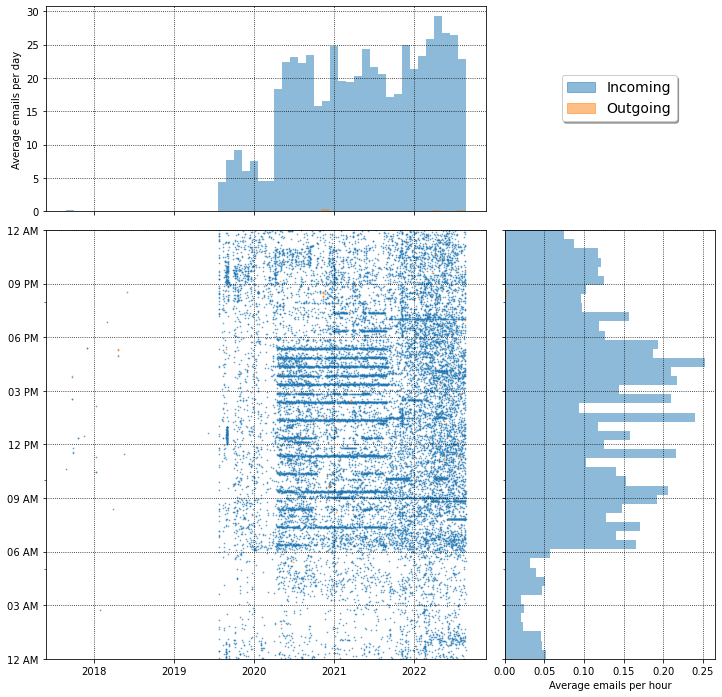

In [65]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.figure(figsize=(12,12));
tpl = TriplePlot()
tpl.plot(inbox, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7],fontsize=14, shadow=True);

on the average emails per day, i get less emails from the 1 - 10 of every month but have more inbox from the 20 - 30 of every month.
i receive more emails from 6am till 12am but less from 1am till 5am everyday

<AxesSubplot:>

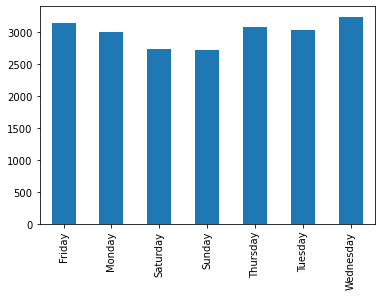

In [66]:
# What is the average number of emails per day?
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [70]:
dfs['from'].value_counts().head()

donotreply@wordpress.com         8916
notification@facebookmail.com    4143
messages@facebookmail.com        1120
alerts@germanpod101.com           440
hello@jobberman.com               382
Name: from, dtype: int64

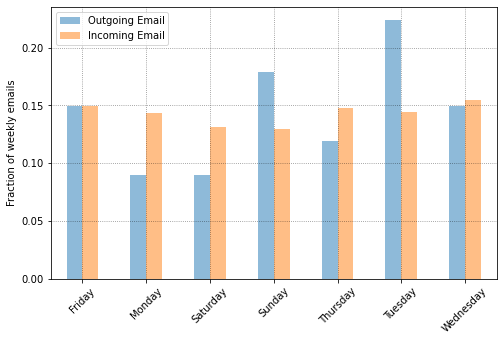

In [72]:
# The most active days for receiving and sending emails separately
sdw = sent.groupby('dayofweek').size()/len(sent)
rdw = inbox.groupby('dayofweek').size()/len(inbox)

df_tmp = pd.DataFrame(data={'Outgoing Email':sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar',rot=45,figsize=(8,5),alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':',color='k',alpha=0.5)

In [73]:
# 6. The most active time of day for email communication
import scipy.ndimage
from scipy.interpolate import interp1d

In [74]:
import warnings
warnings.filterwarnings("ignore")

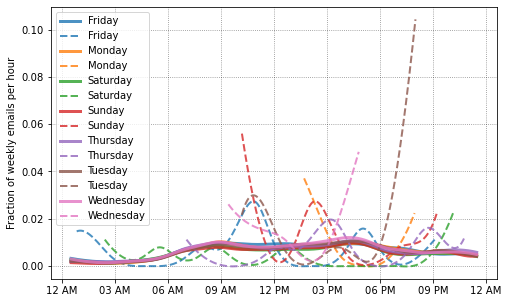

In [75]:
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = inbox[inbox['dayofweek'] == dow]
    weights = np.ones(len(df_r))/len(inbox)
    def wfun(x): return weights
    plot_number_perdhour_per_year(
        df_r, ax, dt=1, smooth=True, color=f'C{ct}', alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek'] == dow]
    weights = np.ones(len(df_s)) / len(sent)
    def wfun(x): return weights
    plot_number_perdhour_per_year(
        df_s, ax, dt=1, smooth=True, color=f'C{ct}', alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
    ax.set_ylabel('Fraction of weekly emails per hour')
    ax.xaxis.set_major_locator(MaxNLocator(10))
    ax.set_xticklabels([datetime.datetime.strptime(
        str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_xticks()])
    plt.legend(loc='upper left')
    plt.grid(ls=':',color='k',alpha=0.5)

In [88]:
# 7. What am I mostly emailing about?
# from wordcloud import WordCloud
from wordcloud import WordCloud

In [87]:
 !pip install wordcloud

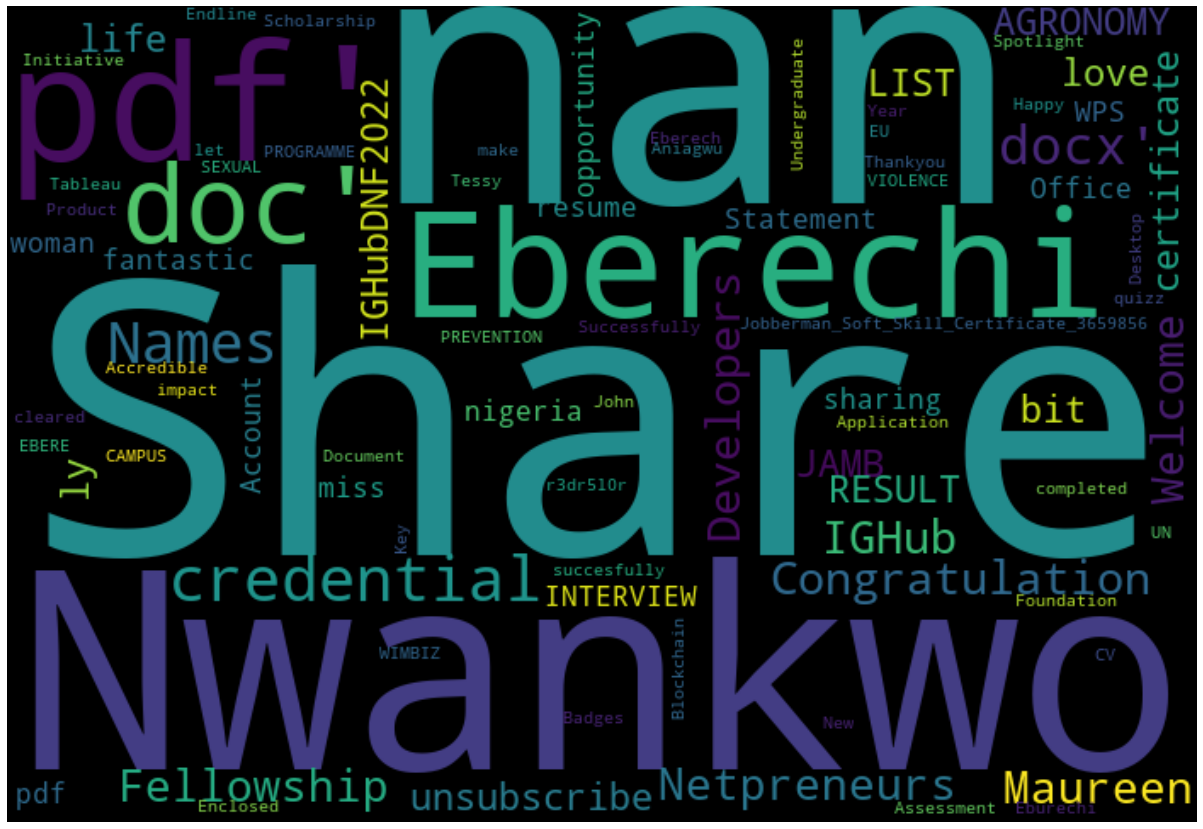

In [89]:
text = ' '.join(map(str, sent['subject'].values))
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:    
    wrd.stopwords.add(sw)
    wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

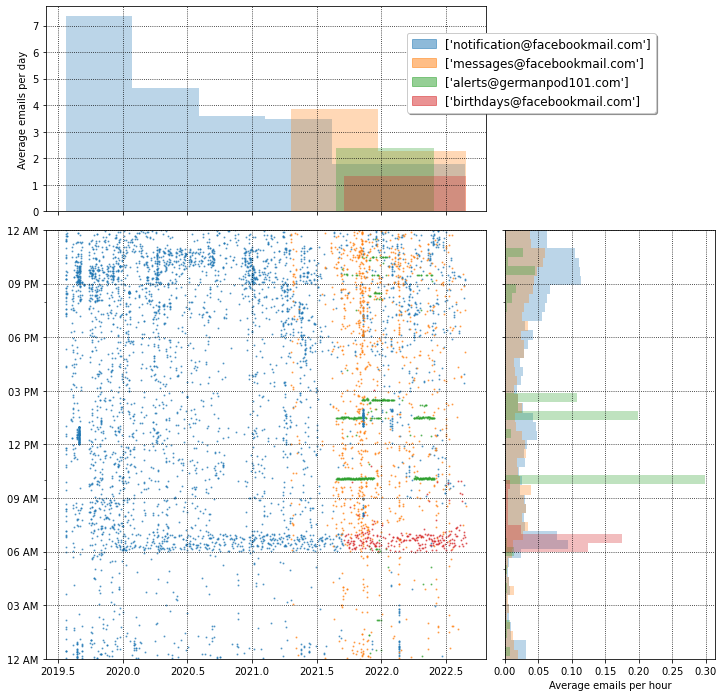

In [84]:
#who do you i communicate with most

addrs = inbox['from'].value_counts()
plt.figure(figsize=(12,12));
tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=[addr], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);